In [1]:
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline

 #foundational package for scientific computing
import numpy as np

#collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import pandas as pd

#collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt

#Visualization
import seaborn as sns

#collection of functions for scientific computing and advance mathematics
import scipy as sp

#collection of machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Common Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve

import pandas as pd
df_Train = pd.read_csv('Train.csv')
df_Test = pd.read_csv('Test.csv')
df_Predict = pd.read_csv('Predict.csv')
df_PCA = pd.read_csv('Data.csv')

In [2]:
train1_y_dummy = df_Train.iloc[:,7].values


test1_y_dummy = df_Test.iloc[:,7].values

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(df_PCA)
df_PCA = pca.transform(df_PCA)

train1_x_dummy = df_PCA[0:18000,:]
test1_x_dummy = df_PCA[18000:20000,:]
predict1_x_dummy = df_PCA[20000:,:]

# 决策树

In [3]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_predL = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predL))
print(confusion_matrix(test1_y_dummy, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test1_y_dummy))

DT = accuracy_score(y_predL,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       619
           1       0.93      0.92      0.93      1381

    accuracy                           0.90      2000
   macro avg       0.88      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000

[[ 530   89]
 [ 106 1275]]
accuracy is 0.9025


In [4]:
from sklearn.metrics import roc_curve, auc

In [5]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test1_y_dummy, y_predL)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8897318676382336

Text(0.5, 0, 'False Positive Rate')

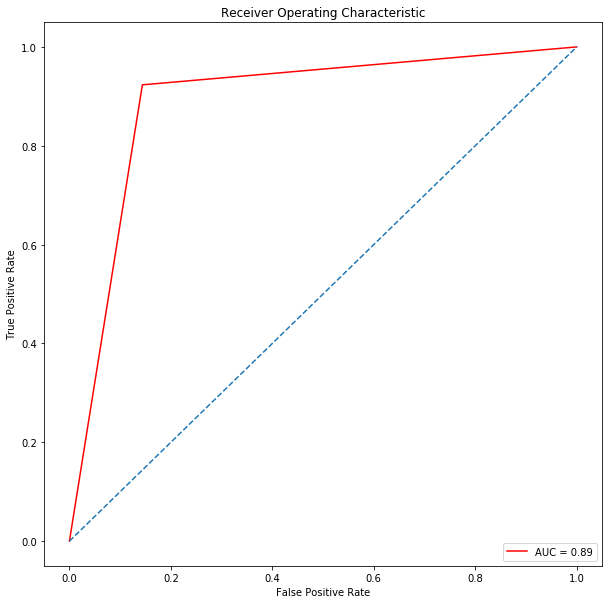

In [6]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 随机森林

In [7]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=10)
Model.fit(train1_x_dummy, train1_y_dummy)
y_predR=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predR))
print(confusion_matrix(y_predR,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predR,test1_y_dummy))

RT = accuracy_score(y_predR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       619
           1       0.97      0.95      0.96      1381

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000

[[ 574   70]
 [  45 1311]]
accuracy is  0.9425


In [8]:
with open("result.txt","w") as f:
    for number in Model.predict(predict1_x_dummy):
        f.write(str(number)+"\n")

# 逻辑回归

In [9]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predLR = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predLR))
print(confusion_matrix(test1_y_dummy, y_predLR))
# Accuracy score
print('accuracy is',accuracy_score(y_predLR,test1_y_dummy))

LR = accuracy_score(y_predLR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       619
           1       0.96      0.93      0.95      1381

    accuracy                           0.93      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

[[ 563   56]
 [  91 1290]]
accuracy is 0.9265


# k近邻算法

In [10]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=15)
Model.fit(train1_x_dummy, train1_y_dummy)

y_predKN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predKN))
print(confusion_matrix(test1_y_dummy, y_predKN))
# Accuracy score

print('accuracy is',accuracy_score(y_predKN,test1_y_dummy))

KNN = accuracy_score(y_predKN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       619
           1       0.97      0.95      0.96      1381

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000

[[ 572   47]
 [  73 1308]]
accuracy is 0.94


# 朴素贝叶斯

In [11]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predN))
print(confusion_matrix(test1_y_dummy, y_predN))
# Accuracy score
print('accuracy is',accuracy_score(y_predN,test1_y_dummy))

NBB = accuracy_score(y_predN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       619
           1       0.96      0.93      0.95      1381

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

[[ 571   48]
 [  94 1287]]
accuracy is 0.929


# 支持向量机

In [12]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predSVM = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predSVM))
print(confusion_matrix(test1_y_dummy, y_predSVM))
# Accuracy score

print('accuracy is',accuracy_score(y_predSVM,test1_y_dummy))

SVMm = accuracy_score(y_predSVM,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       619
           1       0.96      0.95      0.96      1381

    accuracy                           0.94      2000
   macro avg       0.92      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

[[ 571   48]
 [  74 1307]]
accuracy is 0.939


# 分类型SVM

In [13]:
# Support Vector Machine's 
from sklearn.svm import NuSVC

ModelNU = NuSVC()
ModelNU.fit(train1_x_dummy, train1_y_dummy)

y_predNu = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predNu))
print(confusion_matrix(test1_y_dummy, y_predNu))
# Accuracy score

print('accuracy is',accuracy_score(y_predNu,test1_y_dummy))

NuS = accuracy_score(y_predNu,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       619
           1       0.96      0.95      0.96      1381

    accuracy                           0.94      2000
   macro avg       0.92      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

[[ 571   48]
 [  74 1307]]
accuracy is 0.939


# 线性支持向量机

In [14]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

LSVM = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       619
           1       0.96      0.93      0.95      1381

    accuracy                           0.93      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.93      0.93      0.93      2000

[[ 565   54]
 [  94 1287]]
accuracy is 0.926


# 最近邻域分类法

In [15]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=0.4)
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

#summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(test1_y_dummy,y_pred))

#Accouracy score
print('accuracy is ', accuracy_score(test1_y_dummy,y_pred))

RNC = accuracy_score(test1_y_dummy,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       619
           1       0.97      0.92      0.94      1381

    accuracy                           0.93      2000
   macro avg       0.91      0.93      0.91      2000
weighted avg       0.93      0.93      0.93      2000

[[ 578   41]
 [ 109 1272]]
accuracy is  0.925


# 被动感知算法

In [16]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

PAC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       619
           1       0.92      0.95      0.94      1381

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.91      0.91      0.91      2000

[[ 505  114]
 [  63 1318]]
accuracy is 0.9115


# 伯努利贝叶斯分类器

In [17]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

Ber = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       619
           1       0.97      0.80      0.88      1381

    accuracy                           0.84      2000
   macro avg       0.83      0.87      0.83      2000
weighted avg       0.88      0.84      0.85      2000

[[ 586   33]
 [ 277 1104]]
accuracy is 0.845


# 极度随机树

In [18]:
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

ETC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       619
           1       0.92      0.92      0.92      1381

    accuracy                           0.89      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000

[[ 507  112]
 [ 112 1269]]
accuracy is 0.888


# Bagging classifier

In [19]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

BCC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       619
           1       0.96      0.94      0.95      1381

    accuracy                           0.93      2000
   macro avg       0.92      0.93      0.92      2000
weighted avg       0.93      0.93      0.93      2000

[[ 567   81]
 [  52 1300]]
accuracy is  0.9335


# AdaBoost classifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

AdaB = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       619
           1       0.95      0.94      0.95      1381

    accuracy                           0.93      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

[[ 555   78]
 [  64 1303]]
accuracy is  0.929


# 梯度提升决策树分类

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(train1_x_dummy, train1_y_dummy)
y_predGR=ModelG.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predGR))
print(confusion_matrix(y_predGR,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_predGR,test1_y_dummy))

GBCC = accuracy_score(y_predGR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       619
           1       0.96      0.94      0.95      1381

    accuracy                           0.94      2000
   macro avg       0.92      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

[[ 571   76]
 [  48 1305]]
accuracy is  0.938


In [22]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test1_y_dummy, y_predGR)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9337114942111906

Text(0.5, 0, 'False Positive Rate')

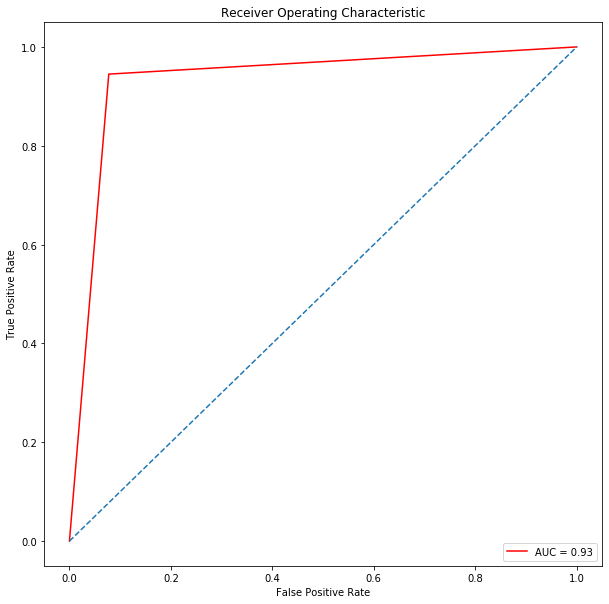

In [23]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# 线性分类分析

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

LDAA = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       619
           1       0.96      0.93      0.94      1381

    accuracy                           0.92      2000
   macro avg       0.90      0.92      0.91      2000
weighted avg       0.93      0.92      0.92      2000

[[ 565  100]
 [  54 1281]]
accuracy is  0.923


# 二次判别分析

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

QDAx = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       619
           1       0.96      0.92      0.94      1381

    accuracy                           0.92      2000
   macro avg       0.90      0.92      0.91      2000
weighted avg       0.93      0.92      0.92      2000

[[ 570  105]
 [  49 1276]]
accuracy is  0.923


In [26]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest',
              'LogisticRegression','K-Nearest Neighbours', 'Naive Bayes', 'SVM', 'Nu-Support Vector Classification',
             'Linear Support Vector Classification', 'Radius Neighbors Classifier', 'Passive Aggressive Classifier','BernoulliNB',
             'ExtraTreeClassifier', "Bagging classifier ", "AdaBoost classifier", 'Gradient Boosting Classifier' ,'Linear Discriminant Analysis',
             'Quadratic Discriminant Analysis'],
    'Score': [DT, RT, LR, KNN,NBB,SVMm, NuS,  LSVM , RNC, PAC, Ber, ETC, BCC, AdaB,  GBCC, LDAA, QDAx]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.9425
3,K-Nearest Neighbours,0.9400
5,SVM,0.9390
6,Nu-Support Vector Classification,0.9390
14,Gradient Boosting Classifier,0.9380
12,Bagging classifier,0.9335
4,Naive Bayes,0.9290
13,AdaBoost classifier,0.9290
2,LogisticRegression,0.9265
7,Linear Support Vector Classification,0.9260


Text(0, 0.5, 'Algorithm')

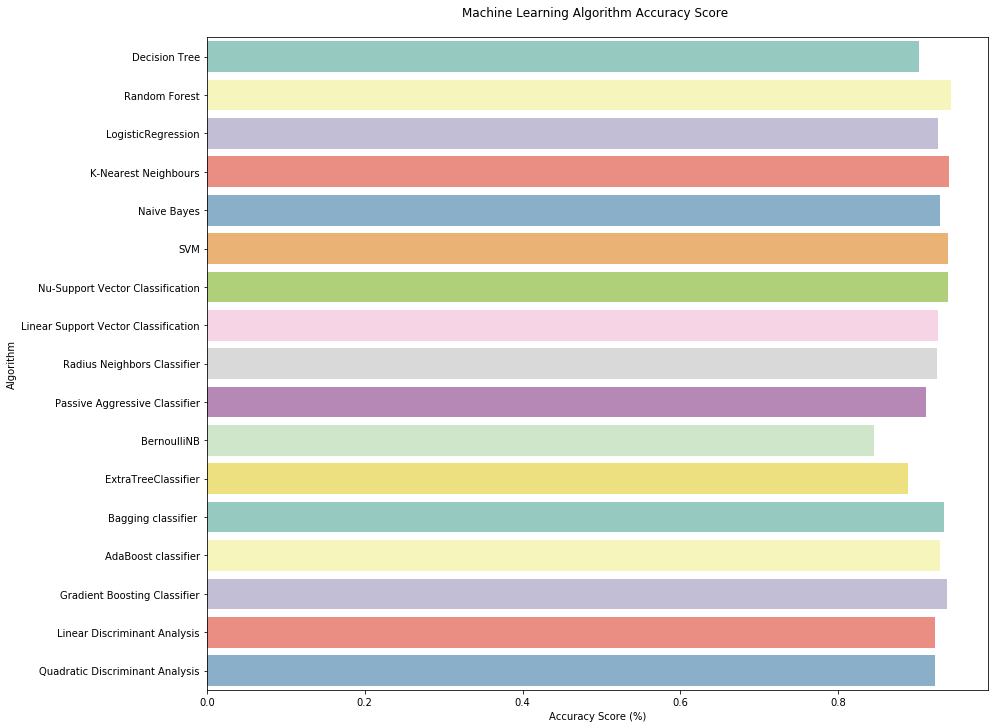

In [27]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')